# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran machine learning untuk supervised learning.

### The Data
'Google BigQuery'
- **select * from `ftds-hacktiv8-project.phase1_ftds_001_hck.heart-failure`**

### The Objective
Membuat model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak.

![Image](https://miro.medium.com/max/4420/1*HDphOMQdTsRUM-O4hudIWA.png)

# A. Library

In [189]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import phik
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# B. Data Loading
*pada data loading akan dilakukan pemuatan data dan mengamatan sederhana*

In [192]:
# load dataset
data = pd.read_csv('h8dsft_P1G3_rizky_anshari.csv')

# mengganti option agar seluruh kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

In [193]:
# menampilkan head data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [194]:
# menapilkan 5 baris data terakhir
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


### 1. Data information

In [195]:
# menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


data info memperlihatkan secara menyeluruh basic info data
- kita memiliki 2 type data (float64(3,int64(10)
- 13 kolom
- 299 row
- tidak terlihat ada missing value

In [196]:
# describe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


- tidak ditemukan anomali pada data

In [197]:
# mendefinisikan value pada masing2 kolom
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
age: 47
anaemia: 2
creatinine_phosphokinase: 208
diabetes: 2
ejection_fraction: 17
high_blood_pressure: 2
platelets: 176
serum_creatinine: 40
serum_sodium: 27
sex: 2
smoking: 2
time: 148
DEATH_EVENT: 2


beberapa kolom memiliki data biner
- anemia, diabetes, high_blood_preassure, sex, smoking, Death_event.

dan kolom-kolom ini juga nilainya telah diencode

## 2. Data Cleaning
*pada bagian ini akan dilakukan pembersihan data*

**Handling Missing Value**

In [198]:
# menjumlahkan missing valaue setiap kolom
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

tidak ditemukan adanya missing value pada data

**Handling Duplicated Data**

In [199]:
# checking duplicated data
data.duplicated().sum()

0

tidak ditemukan data duplicated pada data

# C. Exploratory Data Analysis
*exploring data*

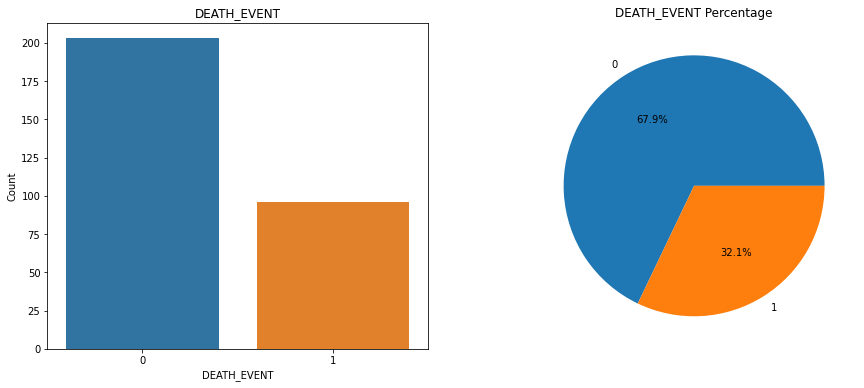

In [200]:
# membuat grafik countplot untuk kolom target

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.DEATH_EVENT.value_counts(), labels=data.DEATH_EVENT.value_counts().index, autopct='%1.1f%%')
plt.title('DEATH_EVENT Percentage')
plt.show()

persentase pasien yang terkenal gagal jantung adalah 32.1 persen, data ini cukup sangat banyak jika dibandingkan total data yaitu sepertiga pasien telah mengalami gagal jantung.
- tindak lanjut cepat perlu dilakukan untuk menurunkan resiko pada masa yang akan datang
- kita akan membuat model untuk solusi hal ini

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


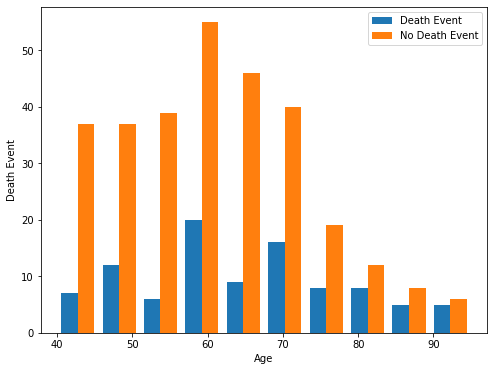

In [201]:
age1 = data[data['DEATH_EVENT'] == 1].age
age = data.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([age1, age], label=['Death Event', 'No Death Event'])
plt.legend()

- pasien dengan presentasi death event terbanyak  yaitu direntang 60-70 tahunan
- kemudian pada 80 90 tahunnya bias, penulis berasumsi data yang dimiliki masih tidak cukup untuk menggambarkan presentase diumur ini. jika dilihat presentasinya snagat besar contohnya pada umur 90 tahunan sekitar 90 persen nya death event 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


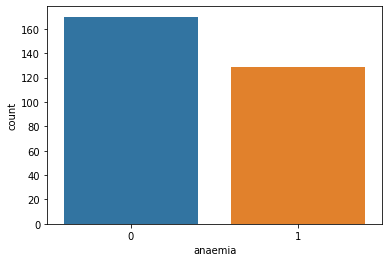

In [202]:
sns.countplot(data['anaemia'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


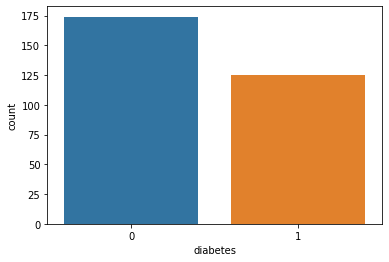

In [203]:
sns.countplot(data['diabetes'])

- ternyata anemia dan diabetes tidak berpengaruh besar pada heart failure
- ini menjadi kabar baik tetapi pola hidup sehat harus tetap dijaga dan diperhatikan

# D. Data Preprocessing
*bagian ini berisi penyiapan data untuk modelling*

#### 1. Split Data
*akan dilakukan pemisahan data inference, data train dan data test.*

In [204]:
# Mengambil data inference
df_inf = data.sample(10, random_state=41)

# Memisahkan data inf dari dataset
df_train_test = data.drop(df_inf.index)

# reset index untuk kedua datanya
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [205]:
# train_test_split
# memisahkan data train dan test
train, test = train_test_split(df_train_test, test_size=0.3, random_state=41)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (202, 13)
Test size:  (87, 13)


- dilakukan pengambilan 10 data inference (karena datanya sedikit)
- data inference di drop agar data tidak dipelajari model
- dan dilakukan pemisahan 70:30 untuk data train test

### 2. Corelation dengan Heatmap
*mencari korelasi/hubungan pada tiap kolom/feature dengan target, untuk menentukan feature yang digunakan*

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


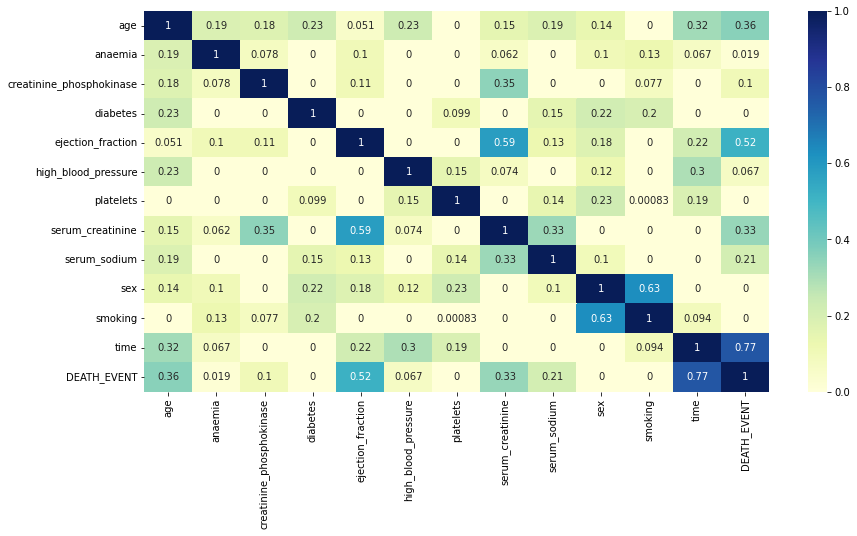

In [206]:
# plot nilai korelasi antar kolom data
plt.figure(figsize=(14,7))
sns.heatmap(data.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

ternyata ditemukan hal-hal yang sangat berpengaruh terhadap keadaan pasien kedepannya meninggal atau tidak meninggal.
- wow ini sungguh2 harus dihindari atau diminimalkan yaitu : time, ejection fraction, age, serum creatinine, dan serum sodium.

kita akan jelaskan lebih detail pada bagian lainnya.

### 3. Feature Selection
*seleksi feature yang digunakan*

In [207]:
# seleksi feature yang digunakan berdasarkan korelasinya
df_train = train[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]
df_test = test[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]
df_train

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
188,55.0,35,1.0,140,206,0
195,60.0,35,1.4,139,258,0
191,40.0,35,1.0,142,214,0
205,60.0,38,0.6,138,40,1
50,67.0,38,1.2,133,245,0
...,...,...,...,...,...,...
236,78.0,40,0.7,137,187,0
282,53.0,60,0.7,133,134,0
89,60.0,60,0.7,136,94,0
243,70.0,45,1.3,136,26,1


### 4. Checking outlier

In [208]:
# membuat fungsi untuk menampilkan histplot dan boxplot
def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

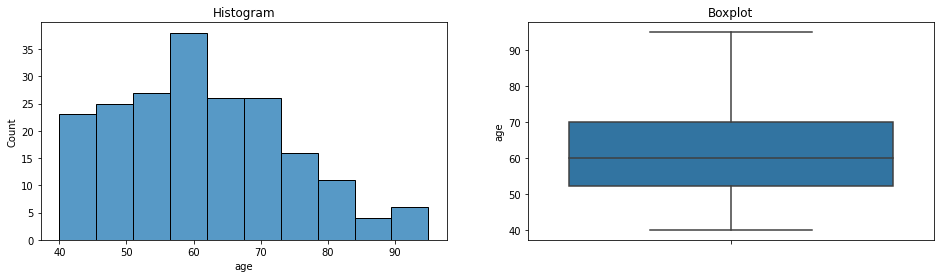


Nilai Skewness:  0.4276168955020809


In [209]:
# histogram dan boxplot kolom age

diagnostic_plots(df_train, 'age')
print('\nNilai Skewness: ', df_train['age'].skew())

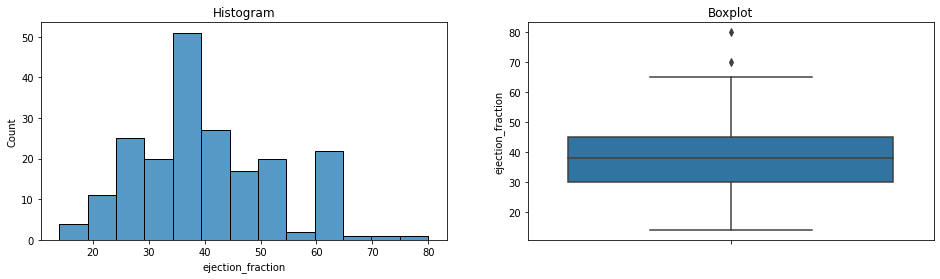


Nilai Skewness:  0.4462761391888138


In [210]:
# histogram dan boxplot kolom ejection_fraction

diagnostic_plots(df_train, 'ejection_fraction')
print('\nNilai Skewness: ', df_train['ejection_fraction'].skew())

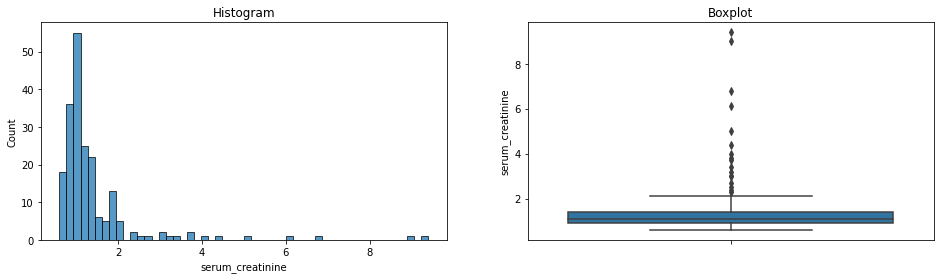


Nilai Skewness:  4.4415800036028275


In [211]:
# histogram dan boxplot kolom serum_creatinine

diagnostic_plots(df_train, 'serum_creatinine')
print('\nNilai Skewness: ', df_train['serum_creatinine'].skew())

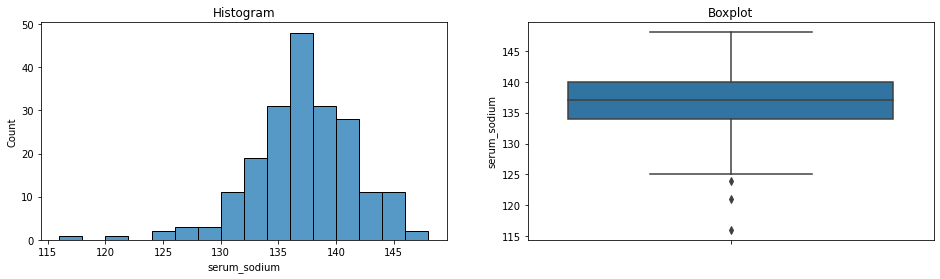


Nilai Skewness:  -0.7065550272390841


In [212]:
# histogram dan boxplot kolom serum_sodium

diagnostic_plots(df_train, 'serum_sodium')
print('\nNilai Skewness: ', df_train['serum_sodium'].skew())

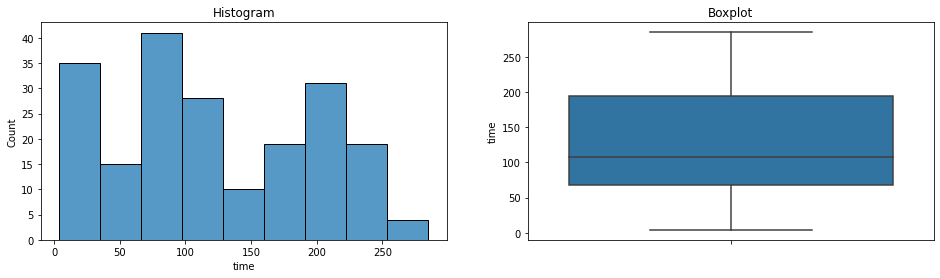


Nilai Skewness:  0.21452655661108885


In [213]:
# histogram dan boxplot kolom time

diagnostic_plots(df_train, 'time')
print('\nNilai Skewness: ', df_train['time'].skew())

tidak ditemukan outlier pada feature age dan time.

untuk feature ejection fraction, serum creatinine, serum sodium. akan dilakukan capping dengan tujuan agar data yang dibaca model tetap  bervariatif dan agar jumlah datanya cukup untuk model belajar

### 4. Handing Outlier

In [214]:
# fungsi untuk mencari batas atas dan bawah untuk outliers

def find_normal_bound(data, feature):
    normal_lower_bound = data[feature].mean() - 3 * data[feature].std()
    normal_upper_bound = data[feature].mean() + 3 * data[feature].std()

    return normal_lower_bound, normal_upper_bound

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    skew_lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    skew_upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return skew_lower_bound, skew_upper_bound

In [215]:
# mencari outlier untuk age

normal_lower_bound, normal_upper_bound = find_normal_bound(df_train, 'ejection_fraction')
normal_lower_bound, normal_upper_bound

print('Batas bawah ejection_fraction:',normal_lower_bound)
print('Batas atas ejection_fraction:',normal_upper_bound)
print('')
print('Outliers bawah ejection_fraction : {}'.format(len(df_train[df_train['ejection_fraction'] < normal_lower_bound])))
print('Outliers atas ejection_fraction : {}'.format(len(df_train[df_train['ejection_fraction'] > normal_upper_bound])))

Batas bawah ejection_fraction: 2.2146535937047105
Batas atas ejection_fraction: 75.51801967362202

Outliers bawah ejection_fraction : 0
Outliers atas ejection_fraction : 1


In [216]:
# mencari outlier untuk age

normal_lower_bound, normal_upper_bound = find_normal_bound(df_train, 'serum_creatinine')
normal_lower_bound, normal_upper_bound

print('Batas bawah serum_creatinine:',normal_lower_bound)
print('Batas atas serum_creatinine:',normal_upper_bound)
print('')
print('Outliers bawah serum_creatinine : {}'.format(len(df_train[df_train['serum_creatinine'] < normal_lower_bound])))
print('Outliers atas serum_creatinine : {}'.format(len(df_train[df_train['serum_creatinine'] > normal_upper_bound])))

Batas bawah serum_creatinine: -2.0250633178945554
Batas atas serum_creatinine: 4.854073218884655

Outliers bawah serum_creatinine : 0
Outliers atas serum_creatinine : 5


In [217]:
# mencari outlier untuk age

normal_lower_bound, normal_upper_bound = find_normal_bound(df_train, 'serum_sodium')
normal_lower_bound, normal_upper_bound

print('Batas bawah serum_sodium:',normal_lower_bound)
print('Batas atas serum_sodium:',normal_upper_bound)
print('')
print('Outliers bawah serum_sodium : {}'.format(len(df_train[df_train['serum_sodium'] < normal_lower_bound])))
print('Outliers atas serum_sodium : {}'.format(len(df_train[df_train['serum_sodium'] > normal_upper_bound])))

Batas bawah serum_sodium: 122.88465007234589
Batas atas serum_sodium: 150.26386477913928

Outliers bawah serum_sodium : 2
Outliers atas serum_sodium : 0


total outlier data ada 8

- motode capping yang digunakan adalah winsorizer

In [218]:
# memasukan fungsi winsorizer
# dan langsung dihandling pada df train test
capper_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['age', 'serum_creatinine', 'serum_sodium'])
capper_normal.fit(df_train)
df_train_clean = capper_normal.transform(df_train)
df_test_clean = capper_normal.transform(df_test)

In [219]:
# menampilkan info sebelum dan setelah capping
print('train - Sebelum Capping')
print(df_train[['age', 'serum_creatinine', 'serum_sodium']].describe())
print('')
print('train - Setelah Capping')
print(df_train_clean[['age', 'serum_creatinine', 'serum_sodium']].describe())

train - Sebelum Capping
              age  serum_creatinine  serum_sodium
count  202.000000        202.000000    202.000000
mean    61.518153          1.414505    136.574257
std     12.379745          1.146523      4.563202
min     40.000000          0.600000    116.000000
25%     52.250000          0.900000    134.000000
50%     60.000000          1.100000    137.000000
75%     70.000000          1.400000    140.000000
max     95.000000          9.400000    148.000000

train - Setelah Capping
              age  serum_creatinine  serum_sodium
count  202.000000        202.000000    202.000000
mean    61.518153          1.354952    136.617670
std     12.379745          0.827191      4.401469
min     40.000000          0.600000    122.884650
25%     52.250000          0.900000    134.000000
50%     60.000000          1.100000    137.000000
75%     70.000000          1.400000    140.000000
max     95.000000          4.854073    148.000000


angka-angka nya tidak begitu berbeda signifikan ini sesuai yang diinginkan penulis agar data tetap terlihat real

### 6. Split Feature dan Target

In [220]:
# melakukan pemisahan antara data feature dan target predict
X_train = df_train_clean.drop(columns='DEATH_EVENT')
y_train = df_train_clean['DEATH_EVENT']

X_test = df_test_clean.drop(columns='DEATH_EVENT')
y_test = df_test_clean['DEATH_EVENT']

In [221]:
# menampilkan X_train
X_train

,age,ejection_fraction,serum_creatinine,serum_sodium,time
188,55.0,35,1.0,140.0,206
195,60.0,35,1.4,139.0,258
191,40.0,35,1.0,142.0,214
205,60.0,38,0.6,138.0,40
50,67.0,38,1.2,133.0,245
...,...,...,...,...,...
236,78.0,40,0.7,137.0,187
282,53.0,60,0.7,133.0,134
89,60.0,60,0.7,136.0,94
243,70.0,45,1.3,136.0,26


### 7. Handling imbalance data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Imbalanced')

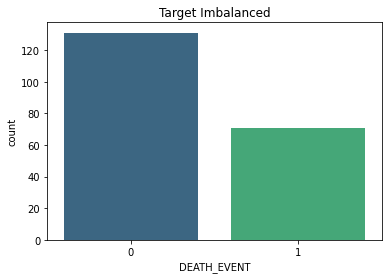

In [222]:
# menampilkan barplot data target
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Imbalanced')

In [223]:
# handling data imbalance pada data train
smote = SMOTE(sampling_strategy='minority')
X_train ,y_train = smote.fit_resample(X_train ,y_train)

print(X_train.shape ,y_train.shape)

(262, 5) (262,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Balanced')

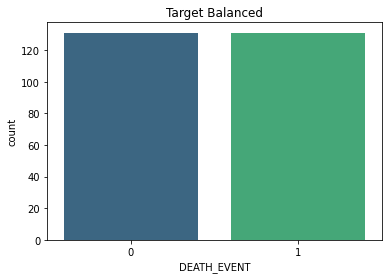

In [224]:
# menampilkan barplot untuk melihat hasil perubahan
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Balanced')

- handling imbalance data telah selesai dilakukan, sebenernya data tidak extream imbalance. oleh karena itu data dapat dibiarkan atau dilakukan balancing
- penulis melakukan balancing dengan tujuan untuk aplikatif ilmu yang telah dipelajari

### 8. Split kolom numerikal dan kategorikal


In [225]:
# fungsi untuk memisahkan kolom numerik dengan kolom kategori
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerikal:', num_columns)
print('Kolom kategorikal:', cat_columns)

Kolom numerikal: ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
Kolom kategorikal: []


In [226]:
# memisahkan data train dan test berdasarkan tipe data
X_train_num = X_train[num_columns]

X_test_num = X_test[num_columns]

tidak terdapat feature kategorikal

### 9. Feature Scalling

In [227]:
# scaling data X_train, X_test pada kolom num menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)

X_train_final

array([[-0.64480476, -0.22092405, -0.51778372,  0.80681989,  1.21747257],
       [-0.24794907, -0.22092405, -0.04127283,  0.57823526,  1.89676025],
       [-1.83537182, -0.22092405, -0.51778372,  1.26398916,  1.32197837],
       ...,
       [ 1.30707744, -0.304448  ,  3.77940482, -0.77461265, -1.32985619],
       [-0.63592402, -0.13740009, -0.76137078, -0.76769649, -1.02940203],
       [-0.48795857, -0.05387614,  1.14431276,  0.29628884, -1.09471815]])

In [228]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4
0,-0.644805,-0.220924,-0.517784,0.806820,1.217473
1,-0.247949,-0.220924,-0.041273,0.578235,1.896760
2,-1.835372,-0.220924,-0.517784,1.263989,1.321978
3,-0.247949,0.029648,-0.994295,0.349651,-0.951023
4,0.307649,0.029648,-0.279528,-0.793273,1.726938
...,...,...,...,...,...
257,0.623313,0.697839,0.116350,1.388845,0.851702
258,-1.573344,-1.223211,-0.315422,0.784856,-0.650569
259,1.307077,-0.304448,3.779405,-0.774613,-1.329856
260,-0.635924,-0.137400,-0.761371,-0.767696,-1.029402


scalling dilakukan dengan tujuan agar model dapat belajar dengan baik, karena meskipun datanya adalah numerik tetapi range pada tiap feature berbeda.
- scalling ini dilakukan untuk menyeragamkan range nya

# E. Modelling
*dilakukan modelling dengan default parameternya*

In [229]:
# Random Forest
rf= RandomForestClassifier()
rf.fit(X_train_final,y_train)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_final,y_train)

XGBClassifier()

model random forest adalah salah satu model terbaik (tree base), begitu juga xgboost.
kita akan melakukan modelling pada best model ini

# F. Model Training Test

In [230]:
# Random Forest
y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf = rf.predict(X_test_final)

# XGBoost
y_pred_train_xgb = xgb.predict(X_train_final)
y_pred_test_xgb = xgb.predict(X_test_final)

# G. Model Evaluation

In [231]:
# Evaluasi model Random Forest
print("="*20,"Random Forest","="*20)
print("\n")

y_prob_train = rf.predict_proba(X_train_final)[:,1]
y_prob_test = rf.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Random Forest ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       131

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262

ROC-AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        64
           1       0.70      0.83      0.76        23

    accuracy                           0.86        87
   macro avg       0.82      0.85      0.83        87
weighted avg       0.87      0.86      0.87        87

ROC-AUC Score Test: 0.8994565217391304


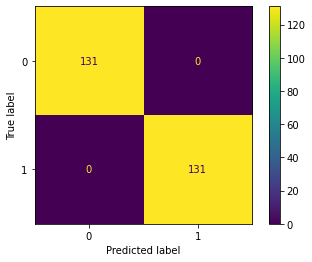

In [232]:
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [233]:
# Evaluasi model XGBoost
print("="*20,"XGBoost","="*20)
print("\n")

y_prob_train = xgb.predict_proba(X_train_final)[:,1]
y_prob_test = xgb.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_xgb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== XGBoost ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       131
           1       0.98      0.95      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

ROC-AUC Score Train: 0.9973195035254356


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        64
           1       0.66      0.83      0.73        23

    accuracy                           0.84        87
   macro avg       0.79      0.83      0.81        87
weighted avg       0.86      0.84      0.84        87

ROC-AUC Score Test: 0.8648097826086956


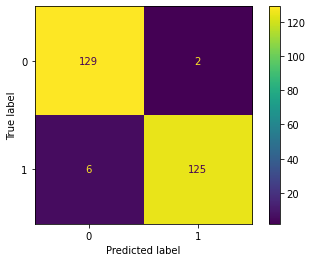

In [234]:
cm = confusion_matrix(y_train, y_pred_train_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot()
plt.show()

- pada default modelnya didapati model terbaik adalah **Random Forest** dengan ROC_AUC train 1 dan test 0.9
- untuk recall dan precisionnya juga sangat baik model dapat sepenuhnya membedakan data
- tetapi yang menjadi catatkan model Overfit, model belajar terlalu baik ini digambarkan pada nilai test nya yang berbeda significant


## GridSearch CV

In [235]:
params = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

In [236]:
from sklearn.model_selection import GridSearchCV
dt= RandomForestClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=3, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train_final, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             return_train_score=True, scoring='accuracy')

In [249]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
best score: 0.8854493207941484


In [250]:
dt_best = dt_grid.best_estimator_
print(dt_best)

RandomForestClassifier(criterion='entropy', n_estimators=700, random_state=1)


In [255]:
y_pred_train2 = dt_best.predict(X_train_final)
print('roc_auc train: ', roc_auc_score(y_train, y_pred_train2))

y_pred_test2 = dt_best.predict(X_test_final)
print('roc_auc test: ', roc_auc_score(y_test, y_pred_test2))

roc_auc train:  1.0
roc_auc test:  0.8427309782608696


- model overfit
- setelah dilakukan hyperparameter tunning, model improving dari overfitnya akan tetapi sekarang nilai roc_auc nya yang menurun

# Data Inference

In [240]:
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,70.0,0,93,0,35,0,185000.0,1.1,134,1,1,208,0
1,45.0,0,582,1,38,0,302000.0,0.9,140,0,0,244,0
2,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
3,73.0,0,582,0,35,1,203000.0,1.3,134,1,0,195,0
4,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11,1
5,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117,0
6,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
7,51.0,0,1380,0,25,1,271000.0,0.9,130,1,0,38,1
8,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
9,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187,0


In [241]:
capper_normal.fit(df_inf)

Winsorizer(tail='both', variables=['age', 'serum_creatinine', 'serum_sodium'])

In [242]:
data_inf_num = df_inf[num_columns]

In [243]:
data_inf_final = scaler.transform(data_inf_num)
data_inf_final

array([[ 0.5457623 , -0.22092405, -0.39865599, -0.56468791,  1.24359902],
       [-1.43851613,  0.02964782, -0.63691144,  0.80681989,  1.7138751 ],
       [-0.00983566,  1.86717481, -0.27952827,  1.94974306,  0.44674233],
       [ 0.78387572, -0.22092405, -0.16040055, -0.56468791,  1.07377711],
       [-1.43851613, -0.63854382, -0.39865599,  0.12106599, -1.32985619],
       [-0.0892068 ,  1.86717481, -0.63691144,  0.57823526,  0.0548456 ],
       [-1.12103158, -0.63854382, -0.51778372,  0.34965063, -1.31679297],
       [-0.96228931, -1.05616359, -0.63691144, -1.47902644, -0.97714913],
       [-1.43851613,  1.44955504, -0.75603916,  1.03540452,  1.88369702],
       [-0.24794907, -1.05616359,  2.46040934, -0.10751864,  0.96927131]])

In [253]:
# melakukan prediksi terhadap data inference dengan model decision tree

y_pred_inf_dt = dt_best.predict(data_inf_final)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf_dt, columns=['model_predict'])
y_pred_inf_df_dt

,model_predict
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,1
8,0
9,1


In [254]:
pd.concat([df_inf, y_pred_inf_df_dt], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,model_predict
0,70.0,0,93,0,35,0,185000.0,1.1,134,1,1,208,0,0
1,45.0,0,582,1,38,0,302000.0,0.9,140,0,0,244,0,0
2,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0,0
3,73.0,0,582,0,35,1,203000.0,1.3,134,1,0,195,0,0
4,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11,1,1
5,62.0,0,30,1,60,1,244000.0,0.9,139,1,0,117,0,0
6,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0,1
7,51.0,0,1380,0,25,1,271000.0,0.9,130,1,0,38,1,1
8,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0,0
9,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187,0,1


# END GAME 1

model dapat memilah data dengan baik
- secara rata2 model dapat memprediksi 90 persen data benar
- dengan nilai eror nya yang relatif kecil
- model terbaik untuk data ini adalah random forest ini dibuktikan dari defaul modelnya. yang menjadi catatan adalah pengolahan data masih belum cukup optimal tetap untuk hyperparamter model nya sudah cukup optimal
- pada tahap lanjutan data harus diolah lagi pada preprocessing dengan lebih baik seperti handling outlier, scalling yang tepat dan lain sebaginya.
- sebelum data di balancing penulis telah mencoba untuk data imbalance, hasilnya data balance improving membuat model sedikit lebih baik.
- perlu diperhatikan juga untuk data yang diolah agar lebih banyak dengan harapan pembelajaran model optimal


**Next Step Improving Model**

*End Game*

jika model ini telah disempurnakan, maka tenaga medis dapat menggunakan model untuk mengetahui pasien impact heart failure.

ini akan sangat bergunakan untuk screening tahap awal mereka